###Predict the percentage scores according to the number of hours studied.


###import all the required libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



###Reading data from link



In [ ]:
url="http://bit.ly/w-data"
data= pd.read_csv(url)
print("data imported successfully")
data.head(10)

data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
data.info

<bound method DataFrame.info of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [ ]:
df=pd.DataFrame(data)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
df["Hours"]

0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8
Name: Hours, dtype: float64

In [ ]:
df["Scores"]

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [ ]:
df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [ ]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

###Plotting the distribution of scores



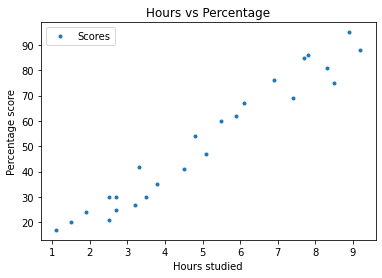

In [ ]:
df.plot(x="Hours",y="Scores",style=".")
plt.title("Hours vs Percentage")
plt.xlabel("Hours studied")
plt.ylabel("Percentage score")
plt.show()


we can see there is a positive relation between hours studied and percentage score*


---



###Preparing Data


In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,1]

next step is to split the data into training and test sets


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

###Training algorithm


In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
print('Training complete')

Training complete


###Plotting the Regression line


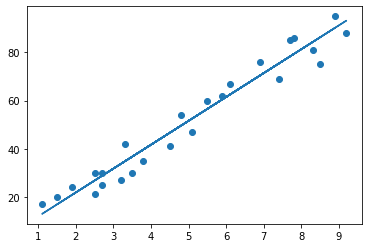

In [ ]:
line=regressor.coef_*x+regressor.intercept_

plt.scatter(x,y)
plt.plot(x,line)
plt.show()

###Making Predictions

In [ ]:
print(x_test)
y_pred=regressor.predict(x_test)

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


comparing actual and predicted y

In [ ]:
df_data=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df_data

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [ ]:
hours=9.25
predicted_score=regressor.predict([[hours]])
print('hours studied',hours)
print('score',predicted_score[0])

hours studied 9.25
score 93.69173248737539


###Checking the model

In [ ]:
from sklearn import metrics
print('absolute error:',metrics.mean_absolute_error(y_test,y_pred))

absolute error: 4.183859899002982
